## Benchmark the performance of the LogRegCCD 

Comparing to the sklearn LogisticRegression model as a baseline.

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

if project_root not in sys.path:
    sys.path.append(project_root)


from sklearn.linear_model import LogisticRegression  # noqa: E402
from sklearn.model_selection import train_test_split  # noqa: E402
from sklearn.metrics import balanced_accuracy_score, f1_score  # noqa: E402

from algorithm.ccd import LogRegCCD  # noqa: E402
from datasets.synthetic import generate_synthetic_data  # noqa: E402
from datasets.real import get_dataset_1, get_dataset_2  # noqa: E402

In [ ]:
synthetic_x, synthetic_y = generate_synthetic_data(0.5, 10000, 50, 1)
real_x1, real_y1 = get_dataset_1(
    path="C:/Users/SPCX/Desktop/github-repositories/aml-ccd/ccd/datasets/dataset_1.arff"
)
real_x2, real_y2 = get_dataset_2(
    path="C:/Users/SPCX/Desktop/github-repositories/aml-ccd/ccd/datasets/dataset_2.arff"
)

In [3]:
train_synthetic_x, test_synthetic_x, train_synthetic_y, test_synthetic_y = (
    train_test_split(synthetic_x, synthetic_y, test_size=0.2, random_state=42)
)
train_real_x1, test_real_x1, train_real_y1, test_real_y1 = train_test_split(
    real_x1, real_y1, test_size=0.2, random_state=42
)
train_real_x2, test_real_x2, train_real_y2, test_real_y2 = train_test_split(
    real_x2, real_y2, test_size=0.2, random_state=42
)

In [4]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_synthetic_x = scaler.fit_transform(train_synthetic_x)
test_synthetic_x = scaler.transform(test_synthetic_x)
train_real_x1 = scaler.fit_transform(train_real_x1)
test_real_x1 = scaler.transform(test_real_x1)
train_real_x2 = scaler.fit_transform(train_real_x2)
test_real_x2 = scaler.transform(test_real_x2)

In [6]:
print("###### LogisticRegression ######")
lr_synthetic = LogisticRegression(max_iter=1000)
lr_synthetic.fit(train_synthetic_x, train_synthetic_y)
print(
    "f1 score synthetic data: ",
    f1_score(test_synthetic_y, lr_synthetic.predict(test_synthetic_x)),
)
print(
    "balanced accuracy score synthetic data: ",
    balanced_accuracy_score(test_synthetic_y, lr_synthetic.predict(test_synthetic_x)),
)
print("")
lr_real1 = LogisticRegression(max_iter=1000)
lr_real1.fit(train_real_x1, train_real_y1)
print("f1 score real data 1: ", f1_score(test_real_y1, lr_real1.predict(test_real_x1)))
print(
    "balanced accuracy score real data 1: ",
    balanced_accuracy_score(test_real_y1, lr_real1.predict(test_real_x1)),
)
print("")
lr_real2 = LogisticRegression(max_iter=1000)
lr_real2.fit(train_real_x2, train_real_y2)
print("f1 score real data 2: ", f1_score(test_real_y2, lr_real2.predict(test_real_x2)))
print(
    "balanced accuracy score real data 2: ",
    balanced_accuracy_score(test_real_y2, lr_real2.predict(test_real_x2)),
)
print("")

print("###### LogRegCCD ######")
ccd_synthetic = LogRegCCD()
ccd_synthetic.fit(train_synthetic_x, train_synthetic_y)
print(
    "f1 score synthetic data: ",
    f1_score(test_synthetic_y, ccd_synthetic.predict_proba(test_synthetic_x) > 0.5),
)
print(
    "balanced accuracy score synthetic data: ",
    balanced_accuracy_score(
        test_synthetic_y, ccd_synthetic.predict_proba(test_synthetic_x) > 0.5
    ),
)
print("")

###### LogisticRegression ######
f1 score synthetic data:  1.0
balanced accuracy score synthetic data:  1.0

f1 score real data 1:  0.746031746031746
balanced accuracy score real data 1:  0.7824424163407214

f1 score real data 2:  0.18461538461538463
balanced accuracy score real data 2:  0.48373594833771827

###### LogRegCCD ######


c:\Users\SPCX\Desktop\github-repositories\aml-ccd\ccd\algorithm\ccd.py:115: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(beta0 + X_train @ beta))


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

###### LogisticRegression 2 features ######
f1 score synthetic data:  1.0
balanced accuracy score synthetic data:  1.0


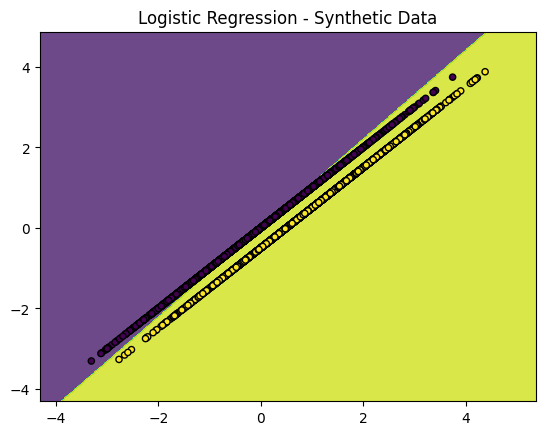

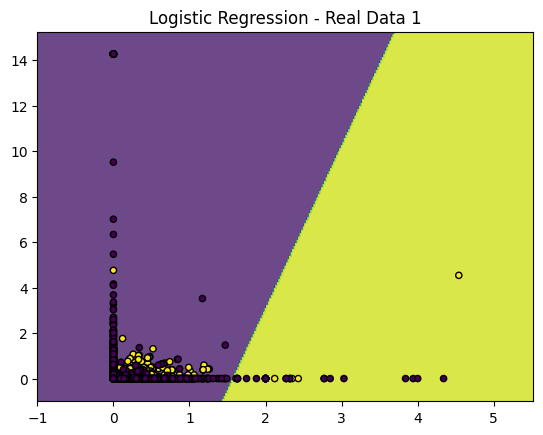

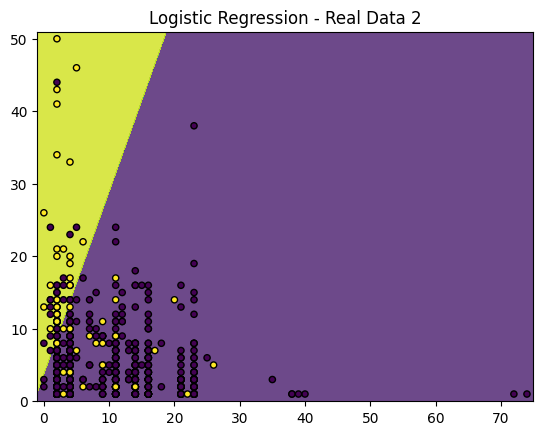

In [ ]:
# plot the decision boundary
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # x has 50 features, so we need to flatten the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()


lr_synthetic_2_features = LogisticRegression(max_iter=1000)
lr_real1_2_features = LogisticRegression(max_iter=1000)
lr_real2_2_features = LogisticRegression(max_iter=1000)
lr_synthetic_2_features.fit(train_synthetic_x[:, :2], train_synthetic_y)
lr_real1_2_features.fit(train_real_x1[:, :2], train_real_y1)
lr_real2_2_features.fit(train_real_x2[:, :2], train_real_y2)
print("###### LogisticRegression synthetic 2 features ######")
print(
    "f1 score synthetic data: ",
    f1_score(
        test_synthetic_y, lr_synthetic_2_features.predict(test_synthetic_x[:, :2])
    ),
)
print(
    "balanced accuracy score synthetic data: ",
    balanced_accuracy_score(
        test_synthetic_y, lr_synthetic_2_features.predict(test_synthetic_x[:, :2])
    ),
)
plot_decision_boundary(
    synthetic_x,
    synthetic_y,
    lr_synthetic_2_features,
    "Logistic Regression - Synthetic Data",
)
print("### LogisticRegression real data 1 2 features ###")
print(
    "f1 score real data 1: ",
    f1_score(test_real_y1, lr_real1_2_features.predict(test_real_x1[:, :2])),
)
print(
    "balanced accuracy score real data 1: ",
    balanced_accuracy_score(
        test_real_y1, lr_real1_2_features.predict(test_real_x1[:, :2])
    ),
)
plot_decision_boundary(
    real_x1, real_y1, lr_real1_2_features, "Logistic Regression - Real Data 1"
)
print("### LogisticRegression real data 2 2 features ###")
print(
    "f1 score real data 2: ",
    f1_score(test_real_y2, lr_real2_2_features.predict(test_real_x2[:, :2])),
)
print(
    "balanced accuracy score real data 2: ",
    balanced_accuracy_score(
        test_real_y2, lr_real2_2_features.predict(test_real_x2[:, :2])
    ),
)
plot_decision_boundary(
    real_x2, real_y2, lr_real2_2_features, "Logistic Regression - Real Data 2"
)